In [52]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import hvplot.pandas
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso
from numpy import arange
import statsmodels.api as sm
from statsmodels.tools.tools import pinv_extended
from yellowbrick.model_selection import feature_importances
from yellowbrick.regressor import prediction_error

In [53]:
#Import train set in a DF
train_set = pd.read_excel('/Users/lucy/Desktop/zoopla/train_set.xlsx')

In [54]:
#Import test set in a DF
test_set = pd.read_excel('/Users/lucy/Desktop/zoopla/test_set.xlsx')

In [55]:
#Check missing values
train_set.isnull().sum()

bedrooms                                     0
bathrooms                                    0
num_reception                                0
latitude                                     0
longitude                                    0
monthly rent                                 0
dist_rail                                    0
dist_school                                  0
bed*recep                                    0
bath*recep                                   0
property type_Detached house                 0
property type_Flat                           0
property type_Semi-detached house            0
property type_Studio                         0
property type_Terraced house                 0
property type_Unknown                        0
furnished state_furnished                    0
furnished state_part_furnished               0
furnished state_unfurnished                  0
ofsted_rating_school_Inadequate              0
ofsted_rating_school_Outstanding             0
ofsted_rating

In [56]:
#Check missing values in the test set
test_set.isnull().sum()

bedrooms                                     0
bathrooms                                    0
num_reception                                0
latitude                                     0
longitude                                    0
monthly rent                                 0
dist_rail                                    0
dist_school                                  0
bed*recep                                    0
bath*recep                                   0
property type_Detached house                 0
property type_Flat                           0
property type_Semi-detached house            0
property type_Studio                         0
property type_Terraced house                 0
property type_Unknown                        0
furnished state_furnished                    0
furnished state_part_furnished               0
furnished state_unfurnished                  0
ofsted_rating_school_Inadequate              0
ofsted_rating_school_Outstanding             0
ofsted_rating

In [57]:
#Get train set info
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11818 entries, 0 to 11817
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   bedrooms                                   11818 non-null  int64  
 1   bathrooms                                  11818 non-null  int64  
 2   num_reception                              11818 non-null  int64  
 3   latitude                                   11818 non-null  float64
 4   longitude                                  11818 non-null  float64
 5   monthly rent                               11818 non-null  int64  
 6   dist_rail                                  11818 non-null  float64
 7   dist_school                                11818 non-null  float64
 8   bed*recep                                  11818 non-null  int64  
 9   bath*recep                                 11818 non-null  int64  
 10  property type_Detached

In [58]:
#Get test set info
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955 entries, 0 to 2954
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   bedrooms                                   2955 non-null   int64  
 1   bathrooms                                  2955 non-null   int64  
 2   num_reception                              2955 non-null   int64  
 3   latitude                                   2955 non-null   float64
 4   longitude                                  2955 non-null   float64
 5   monthly rent                               2955 non-null   int64  
 6   dist_rail                                  2955 non-null   float64
 7   dist_school                                2955 non-null   float64
 8   bed*recep                                  2955 non-null   int64  
 9   bath*recep                                 2955 non-null   int64  
 10  property type_Detached h

In [59]:
#Split the training set into X and y
X = train_set.drop("monthly rent", axis=1)

y = train_set["monthly rent"].copy() 

In [60]:
#Feature scaling using the standard scaler

scaler = StandardScaler()

#Drop the target to feature scale the independent variables
trainset_target = train_set["monthly rent"].values
trainset_pred = train_set.drop("monthly rent", axis=1)

# fit_transform returns a NumPy array, so we need to put it back 
# into a Pandas dataframe
scaled_vals = scaler.fit_transform(trainset_pred)
train_set = pd.DataFrame(scaled_vals, columns=trainset_pred.columns)

# put the non-scaled target back in
train_set['monthly rent'] = trainset_target

# inspect the data
train_set.head()

,bedrooms,bathrooms,num_reception,latitude,longitude,dist_rail,dist_school,bed*recep,bath*recep,property type_Detached house,...,month_Mar,month_May,month_Nov,month_Oct,month_Sep,season_spring,season_summer,season_winter,region_West Midlands,monthly rent
0,0.603825,-0.428152,0.314012,-0.540161,-0.868612,0.261933,-0.605021,0.465122,-0.076548,-0.216685,...,-0.172371,-0.245542,-0.165751,-0.152907,-0.061825,-0.491576,0.683627,-0.249966,0.732394,1050
1,-0.858921,-0.428152,0.314012,-0.453407,-0.733391,-0.470977,-0.917464,-0.422462,-0.076548,-0.216685,...,-0.172371,-0.245542,-0.165751,-0.152907,-0.061825,-0.491576,0.683627,-0.249966,0.732394,795
2,-0.127548,-0.428152,1.857043,2.404435,-1.411497,1.824907,-0.355911,0.908913,0.735518,-0.216685,...,-0.172371,-0.245542,-0.165751,-0.152907,-0.061825,-0.491576,0.683627,-0.249966,0.732394,525
3,-0.127548,-0.428152,0.314012,1.492052,0.248454,1.331755,-0.064578,0.021330,-0.076548,-0.216685,...,-0.172371,-0.245542,-0.165751,-0.152907,-0.061825,-0.491576,0.683627,-0.249966,-1.365385,675
4,-0.127548,-0.428152,0.314012,0.197996,1.313266,-0.460751,-0.719021,0.021330,-0.076548,-0.216685,...,-0.172371,-0.245542,-0.165751,-0.152907,-0.061825,-0.491576,0.683627,-0.249966,-1.365385,650


In [61]:
#Feature scaling on test set
#Drop the target to feature scale the independent variables
testset_target = test_set["monthly rent"].values
testset_predictors = test_set.drop("monthly rent", axis=1)

scaled_vals = scaler.transform(testset_predictors)
test_set = pd.DataFrame(scaled_vals, columns=testset_predictors.columns)

# put the non-scaled target back in
test_set['monthly rent'] = testset_target

test_set.head()

,bedrooms,bathrooms,num_reception,latitude,longitude,dist_rail,dist_school,bed*recep,bath*recep,property type_Detached house,...,month_Mar,month_May,month_Nov,month_Oct,month_Sep,season_spring,season_summer,season_winter,region_West Midlands,monthly rent
0,-0.127548,-0.428152,-1.229019,1.963490,-1.529825,-0.209061,1.590527,-0.866254,-0.888613,-0.216685,...,-0.172371,-0.245542,-0.165751,-0.152907,-0.061825,-0.491576,0.683627,-0.249966,0.732394,895
1,-0.127548,-0.428152,-1.229019,-1.317940,-0.784950,0.168757,-0.292578,-0.866254,-0.888613,-0.216685,...,-0.172371,-0.245542,-0.165751,-0.152907,-0.061825,-0.491576,0.683627,-0.249966,0.732394,650
2,-0.858921,-0.428152,0.314012,-0.476201,-0.739119,-0.688010,0.328087,-0.422462,-0.076548,-0.216685,...,-0.172371,-0.245542,-0.165751,-0.152907,-0.061825,-0.491576,0.683627,-0.249966,0.732394,795
3,-0.127548,-0.428152,0.314012,0.222997,1.207534,0.165916,-0.786576,0.021330,-0.076548,-0.216685,...,-0.172371,-0.245542,-0.165751,-0.152907,-0.061825,-0.491576,0.683627,-0.249966,-1.365385,650
4,2.066572,4.633014,0.314012,-0.811858,0.347018,-0.109067,-0.398133,1.352705,3.171714,-0.216685,...,-0.172371,-0.245542,-0.165751,-0.152907,-0.061825,-0.491576,0.683627,-0.249966,0.732394,2500


In [62]:
# drop target from training set, but keep all others
X_train = train_set.drop("monthly rent", axis=1)

#Only target
y_train = train_set["monthly rent"].copy()

In [63]:
# drop labels for test set, but keep all others
X_test = test_set.drop("monthly rent", axis=1)

#Only target
y_test = test_set["monthly rent"].copy()

In [64]:
#Defining a function to calculate cross validation scores
def display_crosval_scores(model):
    mae_scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_absolute_error", cv=10)
    mae_scores = -mae_scores
    mse_scores = cross_val_score(model, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-mse_scores)
    r2_scores = cross_val_score(model, X_train, y_train, scoring="r2", cv=10)
    r2_scores.mean()
    print('MAE:', mae_scores.mean())
    print('RMSE:', rmse_scores.mean())
    print('R2 Square:', r2_scores.mean())
    print('__________________________________')

#Defining a function to perform cross validation
def cross_val(model):
    mae_scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_absolute_error", cv=10)
    mae_scores = -mae_scores
    mse_scores = cross_val_score(model, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-mse_scores)
    r2_scores = cross_val_score(model, X_train, y_train, scoring="r2", cv=10)
    r2_scores.mean()
    return mae_scores.mean(), rmse_scores.mean(), r2_scores.mean()

#Defining a function to print model scores
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

#Defining a function to evaluate model
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, rmse, r2_square


In [66]:
#Build and fit the model on training set
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

#print intercept of the model
print(lasso_model.intercept_)

925.9301912337118


In [67]:
#predict y in train set
train_pred = lasso_model.predict(X_train)

In [68]:
#Get results for the training set
#Results are very similar to the MLR, R2 and MAE is slightly better
results_train = pd.DataFrame(data=[["Training Set", *evaluate(y_train, train_pred)]], 
                          columns=['LASSO Regression', 'MAE','RMSE', 'R2 Square'])

results_train

,LASSO Regression,MAE,RMSE,R2 Square
0,Training Set,161.198459,254.470766,0.762436


In [70]:
#Apply cross validation evaluation method to ensure model's perfomance in terms of generalisation
#Results very close to the training set.
#Report results of 10 fold CV (in a df format)
results_cv = pd.DataFrame(data=[["Cross Validation", *cross_val(lasso_model)]], 
                          columns=['LASSO Regression', 'MAE','RMSE','R2 Square'])
results_cv

,LASSO Regression,MAE,RMSE,R2 Square
0,Cross Validation,161.863343,255.254185,0.758884


In [117]:
#To discover optimal alpha value to fit the data

#Give a range of values to search from. Values are based on sklearn documentation
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)

seed = np.random.seed(0)
model = Lasso()

# we'll use 10-fold cross-validation
rand_grid_search = RandomizedSearchCV(model, grid, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
                           

rand_grid_search.fit(X_train, y_train)
# summarize
rmse_scores = np.sqrt(-rand_grid_search.best_score_)
print('RMSE: %.3f' % rmse_scores)
print('Config: %s' % rand_grid_search.best_params_)

RMSE: 255.574
Config: {'alpha': 0.54}


In [74]:
#Building a model with the new alpha value
lasso_new = Lasso(alpha=0.54)

In [91]:
#Report results of 10 fold CV (in a df format)
#Results are better 
cv = pd.DataFrame(data=[["Cross Validation", *cross_val(lasso_new)]], 
                          columns=['LASSO Regression', 'MAE','RMSE','R2 Square'])
cv

,LASSO Regression,MAE,RMSE,R2 Square
0,Cross Validation,162.237826,255.204646,0.758979


In [92]:
#Calculate CV scores for visualisation
mse_scores = cross_val_score(lasso_new, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-mse_scores)
mae_scores = cross_val_score(lasso_new, X_train, y_train, scoring="neg_mean_absolute_error", cv=10)
mae_scores = -mae_scores
r2_scores = cross_val_score(lasso_new, X_train, y_train, scoring="r2", cv=10)

In [93]:
#Cross validation scores
df_scores=pd.DataFrame({'rmse scores':rmse_scores,'mae scores':mae_scores, 'r2 scores':r2_scores}) 
df_scores

,rmse scores,mae scores,r2 scores
0,245.814902,157.713622,0.735096
1,232.886587,155.923368,0.755121
2,236.675059,159.242135,0.789471
3,270.394363,167.646457,0.732414
4,254.769465,162.888914,0.770954
5,270.336861,168.110428,0.782125
6,244.949258,155.181594,0.754735
7,260.088897,168.117240,0.766373
8,263.898173,164.120245,0.769631
9,272.232891,163.434254,0.733870


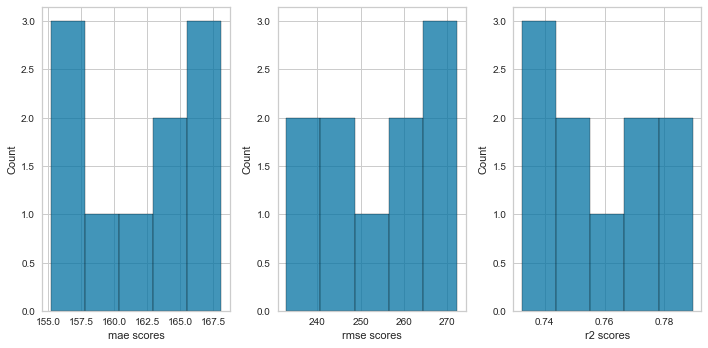

In [94]:
#Histograms of MAE, RMSE and R2 from the CV

df_scores=pd.DataFrame({'rmse scores':rmse_scores,'mae scores':mae_scores, 'r2 scores':r2_scores}) 

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(10, 5)

sns.histplot(df_scores['mae scores'],ax=ax1)
sns.histplot(df_scores['rmse scores'],ax=ax2)
sns.histplot(df_scores['r2 scores'],ax=ax3)

plt.tight_layout()
plt.show()

In [95]:
#Fit the final model on training set
lasso_new.fit(X_train, y_train)

Lasso(alpha=0.54)

In [96]:
#Predict y in training set
train_pred_1 = lasso_new.predict(X_train)

In [97]:
#Put the results of training set in a df
results_ls_train = pd.DataFrame(data=[["Training Set", *evaluate(y_train, train_pred_1)]], 
                          columns=['LASSO Regression', 'MAE', 'RMSE', 'R2 Square'])
results_ls_train

,LASSO Regression,MAE,RMSE,R2 Square
0,Training Set,161.520917,254.317749,0.762722


In [98]:
#Predict y in test set
test_pred_1 = lasso_new.predict(X_test)

In [99]:
#Put the results of test set in a df
results_ls_test = pd.DataFrame(data=[["Test Set", *evaluate(y_test, test_pred_1)]], 
                          columns=['LASSO Regression', 'MAE', 'RMSE', 'R2 Square'])

results_ls_test

,LASSO Regression,MAE,RMSE,R2 Square
0,Test Set,162.217,254.058732,0.766919


In [100]:
#Combine train and test results in a DF
#the test set scores indicate the model is able to generalise well
results_new = results_ls_train.append(results_ls_test, ignore_index=True)
results_new

,LASSO Regression,MAE,RMSE,R2 Square
0,Training Set,161.520917,254.317749,0.762722
1,Test Set,162.217000,254.058732,0.766919


In [28]:
#To get model coefficients

#Add intercept
X_train = sm.add_constant(X_train)
model_lasso = sm.OLS(y_train, X_train)

#use grid search alpha value
result = model_lasso.fit_regularized(
                    alpha = 0.54,
                    L1_wt = 1)

                    
pinv_wexog,_ = pinv_extended(model_lasso.wexog)
normalized_cov_params = np.dot(pinv_wexog, np.transpose(pinv_wexog))

#get coefficients
final = sm.regression.linear_model.OLSResults(model_lasso, 
                                  result.params, 
                                normalized_cov_params)
#model summary
final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           monthly rent   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     840.8
Date:                Sun, 26 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:43:32   Log-Likelihood:                -82225.
No. Observations:               11818   AIC:                         1.645e+05
Df Residuals:                   11772   BIC:                         1.649e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                       925.3902      2.344    394.769      0.000     920.795     929.985
bedrooms                                    306.8842      5.845     52.501      0.000     295.427     318.342
bathrooms                                   152.1534      5.048     30.143      0.000     142.259     162.048
num_reception                                 5.7590      5.704      1.010      0.313      -5.422      16.940
latitude                                    -21.7758      3.810     -5.716      0.000     -29.244     -14.308
longitude                                    43.4889      7.905      5.502      0.000      27.995      58.983
dist_rail                                    -3.8429      2.708     -1.419      0.156      -9.150       1.465
dist_school                                  16.2806      2.451      6.642      0.000      11.476      21.086
bed*recep                                          0      7.885          0      1.000     -15.455      15.455
bath*recep                                         0      7.381          0      1.000     -14.468      14.468
property type_Detached house                  3.4405      4.493      0.766      0.444      -5.367      12.248
property type_Flat                                 0      9.653          0      1.000     -18.922      18.922
property type_Semi-detached house           -30.9178      6.165     -5.015      0.000     -43.002     -18.834
property type_Studio                         53.2772      6.202      8.590      0.000      41.120      65.435
property type_Terraced house                -53.1588      8.086     -6.574      0.000     -69.008     -37.309
property type_Unknown                       -29.8983      4.613     -6.482      0.000     -38.940     -20.857
furnished state_furnished                   121.7368      5.598     21.748      0.000     110.764     132.709
furnished state_part_furnished               13.2933      4.413      3.012      0.003       4.643      21.944
furnished state_unfurnished                 -28.2968      5.546     -5.102      0.000     -39.169     -17.425
ofsted_rating_school_Inadequate              -4.7242      2.396     -1.971      0.049      -9.421      -0.027
ofsted_rating_school_Outstanding              3.1839      2.462      1.293      0.196      -1.643       8.011
ofsted_rating_school_Requires improvement    -3.9656      2.441     -1.625      0.104      -8.750       0.819
ofsted_rating_school_Unknown                 -0.2673      2.445     -0.109      0.913      -5.059       4.524
cluster_label_cluster 2                      23.6448      5.336      4.431      0.000      13.186      34.104
cluster_label_cluster 3                            0      7.596          0      1.000     -14.890      14.890
clu

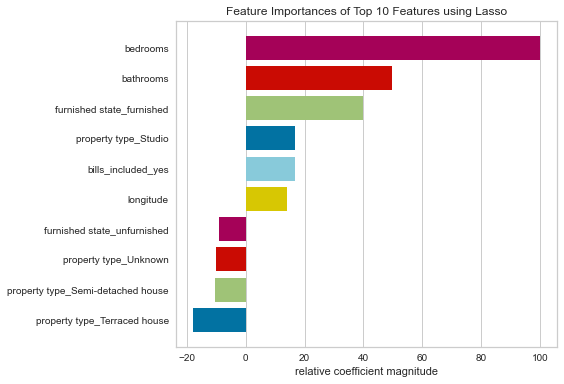

FeatureImportances(ax=<AxesSubplot:title={'center':'Feature Importances of Top 10 Features using Lasso'}, xlabel='relative coefficient magnitude'>,
                   estimator=Lasso(alpha=0.54), topn=10)

In [119]:
#Visualise feature importance
feature_importances(lasso_new, X, y, topn=10)

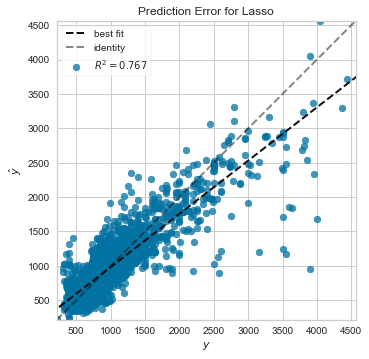

In [110]:
#Visualise Actual vs predicted error
visualizer = prediction_error(lasso_new, X_train, y_train, X_test, y_test)

In [108]:
#Define a function to create a learning curve

def plot_learning_curves(model, X, y):
    train_errors, test_errors = [], []
     
    
    for m in range(50, len(X_train), 1):
        
        # fit a model
        model.fit(X_train[:m], y_train[:m])
    
        
        # evaluate the model on both training and validation sets
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        
        # calculate RMSE and record the results
        train_rmse = np.sqrt(mean_squared_error(y_train_predict, y_train[:m]))
        test_rmse = np.sqrt(mean_squared_error(y_test_predict, y_test))
        
        train_errors.append(train_rmse)
        test_errors.append(test_rmse)
        
    # Create a learning curve
    plt.plot(train_errors, "r-",linewidth=2, label="train")
    plt.plot(test_errors, "b-", linewidth=3, label="test")
    plt.legend(loc="lower right")
    plt.figsize=(8,8)
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.ylim((150, 500))

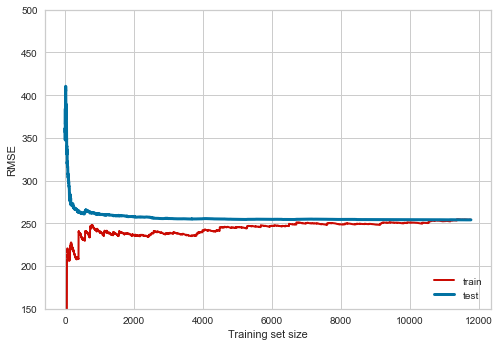

In [109]:
#call the plot learning curve function
plot_learning_curves(lasso_new, X_test, y_test)
